## Movie Recommendation System 
In fraud detection, AML, customer segmentation, recommendation systems etc, we need to calculate distance between feature vectors.

There are multiple ways to do this. This notebook focus on non-graph use cases. 

a. Eculidean distance   emphasize the absoulte value of metrics

b. Cosine similarity  emphasize the ratio between metrics (in Iris example below, B and C are closer than B and A)

c. Jaccard index (ratio between overlap count and union count) for discreet vectors.  Example use cases: 
    find out whether two merchants share similar set of customers.




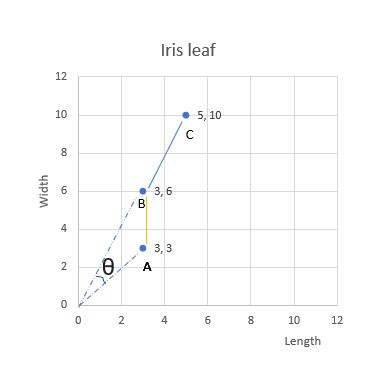

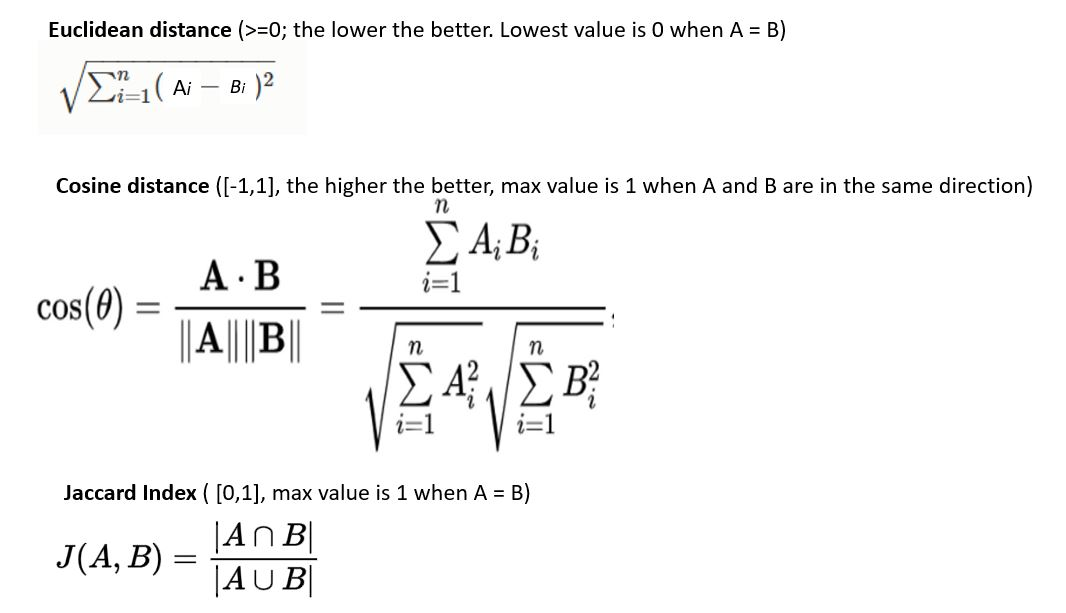

In [119]:
#x and y are array or list
import numpy as np
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [136]:
#https://medium.com/0xcode/content-based-filtering-in-recommendation-system-using-jupyter-colab-notebook-9d3e0520af8
#https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [137]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
movies

,movieId,title,genres
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men,"[Comedy, Romance]"
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II,[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero,"[Animation, Comedy, Fantasy]"
9739,193585,Flint,[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple,"[Action, Animation]"


## 1. Using Jaccard index (words are not weighted), this method runs very slow

In [138]:
genre=movies['genres']
def jaccard_similarity(a, b):
    # convert to set
    a = set(a)
    b = set(b)
    # calucate jaccard similarity  
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [139]:
print(genre[6710])
print(genre[38])
print(jaccard_similarity(genre[6710],genre[38]))

['Action', 'Crime', 'Drama', 'IMAX']
['Action', 'Crime', 'Drama']
0.75


In [140]:
jaccard_matrix=np.zeros((len(genre), len(genre)))
for i in range(len(genre)):
    jaccard_matrix[i][i]=1
    for j in range(i+1,len(genre)):
        jaccard_matrix[i][j]=jaccard_similarity(genre[i],genre[j])
        jaccard_matrix[j][i]=jaccard_matrix[i][j]

jaccard_matrix[:4][:4]        

array([[1.        , 0.6       , 0.16666667, ..., 0.        , 0.16666667,
        0.2       ],
       [0.6       , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.        , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.14285714, 0.        , 0.66666667, ..., 0.33333333, 0.        ,
        0.33333333]])

In [141]:
#function to get movie recommendations that are based on the euclidean similarity scores of the movie genres.
def genre_recommendations3(title):
    idx = indices[title]
    print(movies.iloc[idx])
    jaccard_scores = list(enumerate(jaccard_matrix[idx]))  #enumerate function makes [2.5, 4.6] into [(0,2.5),(1,4.6)]
    jaccard_scores = sorted(jaccard_scores, key=lambda x: x[1], reverse=True)
    jaccard_scores = jaccard_scores[1:21]
    movie_indices = [i[0] for i in jaccard_scores]
    recommendations=pd.DataFrame(movies.iloc[movie_indices])
    recommendations['score']=[i[1] for i in jaccard_scores]
    return recommendations
    

genre_recommendations3('Dark Knight ').head(20)

movieId                           58559
title                      Dark Knight 
genres     [Action, Crime, Drama, IMAX]
Name: 6710, dtype: object


,movieId,title,genres,score
8387,109850,Need for Speed,"[Action, Crime, Drama, IMAX]",1.00
7599,86644,"Fast Five (Fast and the Furious 5, The)","[Action, Crime, Drama, Thriller, IMAX]",0.80
38,42,Dead Presidents,"[Action, Crime, Drama]",0.75
341,384,Bad Company,"[Action, Crime, Drama]",0.75
347,390,Faster Pussycat! Kill! Kill!,"[Action, Crime, Drama]",0.75
430,493,Menace II Society,"[Action, Crime, Drama]",0.75
568,694,"Substitute, The","[Action, Crime, Drama]",0.75
665,875,Nothing to Lose,"[Action, Crime, Drama]",0.75
1645,2194,"Untouchables, The","[Action, Crime, Drama]",0.75
1696,2281,Monument Ave.,"[Action, Crime, Drama]",0.75


## In the Jaccard index method we assume every word has same importance. Let's use TF-IDF to assign weight to words.

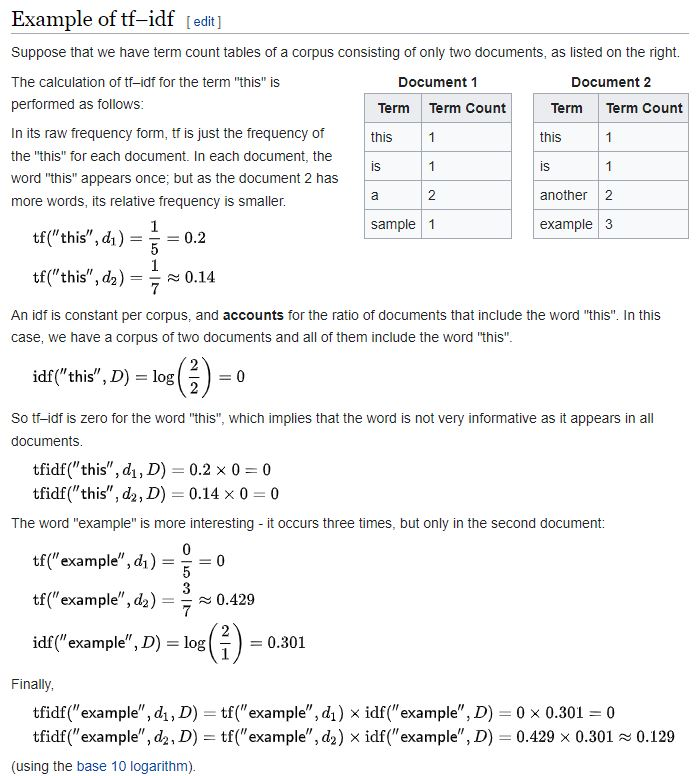

In [125]:
# Convert genres array into a string 
movies['genres'] = movies['genres'].fillna("").astype('str')
movies
#calculate TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape  #number of movie  by number of genres 2 grams


(9742, 177)

## In this movie data,  TF is 1/number of genres or 0 (did not appear) for each genre word. IDF has the same value for a particular word regardless of movie. 

In [126]:
pd.set_option('display.max_rows', 500)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,2),stop_words = 'english')
cnt=count_vect.fit_transform(movies['genres'])
word_list = count_vect.get_feature_names()
#print(list(enumerate(wordfeatures)))
count_list = cnt.toarray().sum(axis=0)  
word_cnt=pd.DataFrame()
word_cnt['word']=word_list
word_cnt['cnt']=count_list
word_cnt


,word,cnt
0,action,1828
1,action adventure,610
2,action animation,66
3,action children,12
4,action comedy,277
5,action crime,273
6,action documentary,1
7,action drama,225
8,action fantasy,31
9,action horror,68


In [127]:
print(tfidf_matrix)  #this is sparse matrix, only the i, j with non zero value is printed

#(1, 108)	0.36554429536140276  TF-IDF for "fantacy" in movie 1
# 1/3*LOG((9742+1)/(779+1))=0.3655


  (0, 63)	0.4051430286389587
  (0, 47)	0.3681884973089335
  (0, 34)	0.38369482677526473
  (0, 18)	0.4008862821540716
  (0, 108)	0.30254034715329503
  (0, 59)	0.16761357728391116
  (0, 46)	0.3162303113127544
  (0, 33)	0.32335863498874723
  (0, 17)	0.26110809240797916
  (1, 51)	0.5795995638728872
  (1, 19)	0.5337814180965866
  (1, 108)	0.36554429536140276
  (1, 46)	0.382085190978399
  (1, 17)	0.31548378439611124
  (2, 68)	0.7695974416123483
  (2, 160)	0.5242383036039113
  (2, 59)	0.36454626441402677
  (3, 103)	0.5645649298589199
  (3, 62)	0.5417511322516687
  (3, 96)	0.2904365851652309
  (3, 160)	0.4522400920963429
  (3, 59)	0.31447995130958456
  (4, 59)	1.0
  (5, 84)	0.604518892749723
  (5, 5)	0.5454388121871825
  :	:
  (9733, 38)	0.835677806885533
  (9733, 96)	0.23714974930952545
  (9733, 33)	0.495381266784903
  (9734, 62)	0.7846149876753742
  (9734, 96)	0.42063760299449465
  (9734, 59)	0.4554594691761476
  (9735, 33)	1.0
  (9736, 86)	1.0
  (9737, 2)	0.5335755137706529
  (9737, 35)	0.4

In [128]:
#another way to count number of rows contains word 'Fantasy'
print( movies['genres'].str.contains('Fantasy', na=False).sum() )

779


In [129]:
movies.iloc[:2]

,movieId,title,genres
0,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji,"['Adventure', 'Children', 'Fantasy']"


## 2. Calculate cosine similarity (the higher the better, max value 1) (based on genres) between movies, if there are N movies, the the matrix is N by N

In [130]:

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]  #show first 4 rows by 4 columns of matrix

array([[1.        , 0.31379419, 0.0611029 , 0.05271111],
       [0.31379419, 1.        , 0.        , 0.        ],
       [0.0611029 , 0.        , 1.        , 0.35172407],
       [0.05271111, 0.        , 0.35172407, 1.        ]])

In [131]:
#create 1 dimensional list to find index based on movie title
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

In [132]:
#function to get movie recommendations that are based on the cosine similarity scores of the movie genres.
def genre_recommendations(title):
    idx = indices[title]
    print(movies.iloc[idx])
    sim_scores = list(enumerate(cosine_sim[idx]))  #enumerate function makes [2.5, 4.6] into [(0,2.5),(1,4.6)]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) 
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    recommendations=pd.DataFrame(movies.iloc[movie_indices])
    recommendations['cosine similarity']=[i[1] for i in sim_scores]
    return recommendations


Compare to Jaccard index method, TF-IDF assign more weight on IMAX as it is rare. 

In [133]:
genre_recommendations('Dark Knight ').head(20)

movieId                                   58559
title                              Dark Knight 
genres     ['Action', 'Crime', 'Drama', 'IMAX']
Name: 6710, dtype: object


,movieId,title,genres,cosine similarity
8387,109850,Need for Speed,"['Action', 'Crime', 'Drama', 'IMAX']",1.000000
8149,102088,"Grandmaster, The (Yi dai zong shi)","['Action', 'Drama', 'IMAX']",0.759349
123,150,Apollo 13,"['Adventure', 'Drama', 'IMAX']",0.701258
8026,97938,Life of Pi,"['Adventure', 'Drama', 'IMAX']",0.701258
8396,110127,Noah,"['Adventure', 'Drama', 'IMAX']",0.701258
38,42,Dead Presidents,"['Action', 'Crime', 'Drama']",0.606605
341,384,Bad Company,"['Action', 'Crime', 'Drama']",0.606605
347,390,Faster Pussycat! Kill! Kill!,"['Action', 'Crime', 'Drama']",0.606605
430,493,Menace II Society,"['Action', 'Crime', 'Drama']",0.606605
568,694,"Substitute, The","['Action', 'Crime', 'Drama']",0.606605


## 3. Calculate Euclidean similarity (the lower the better, min value 0) (based on genres) between movies, if there are N movies, the the matrix is N by N

In [134]:
from sklearn.metrics.pairwise import euclidean_distances
eculidean_sim = euclidean_distances(tfidf_matrix, tfidf_matrix)
eculidean_sim[:4, :4]  #show first 4 rows by 4 columns of matrix

array([[0.        , 1.17149973, 1.37032631, 1.37643662],
       [1.17149973, 0.        , 1.41421356, 1.41421356],
       [1.37032631, 1.41421356, 0.        , 1.13866231],
       [1.37643662, 1.41421356, 1.13866231, 0.        ]])

In [135]:
#function to get movie recommendations that are based on the euclidean similarity scores of the movie genres.
def genre_recommendations2(title):
    idx = indices[title]
    print(movies.iloc[idx])
    eculidean_scores = list(enumerate(eculidean_sim[idx]))  #enumerate function makes [2.5, 4.6] into [(0,2.5),(1,4.6)]
    eculidean_scores = sorted(eculidean_scores, key=lambda x: x[1], reverse=False)
    eculidean_scores = eculidean_scores[1:21]
    movie_indices = [i[0] for i in eculidean_scores]
    recommendations=pd.DataFrame(movies.iloc[movie_indices])
    recommendations['eclidean_distance']=[i[1] for i in eculidean_scores]
    return recommendations
    

genre_recommendations2('Dark Knight ').head(20)

movieId                                   58559
title                              Dark Knight 
genres     ['Action', 'Crime', 'Drama', 'IMAX']
Name: 6710, dtype: object


,movieId,title,genres,eclidean_distance
8387,109850,Need for Speed,"['Action', 'Crime', 'Drama', 'IMAX']",0.000000
8149,102088,"Grandmaster, The (Yi dai zong shi)","['Action', 'Drama', 'IMAX']",0.693760
123,150,Apollo 13,"['Adventure', 'Drama', 'IMAX']",0.772971
8026,97938,Life of Pi,"['Adventure', 'Drama', 'IMAX']",0.772971
8396,110127,Noah,"['Adventure', 'Drama', 'IMAX']",0.772971
38,42,Dead Presidents,"['Action', 'Crime', 'Drama']",0.887011
341,384,Bad Company,"['Action', 'Crime', 'Drama']",0.887011
347,390,Faster Pussycat! Kill! Kill!,"['Action', 'Crime', 'Drama']",0.887011
430,493,Menace II Society,"['Action', 'Crime', 'Drama']",0.887011
568,694,"Substitute, The","['Action', 'Crime', 'Drama']",0.887011


## Note: Cosine and Eclidean methods generated the same recommendations in this case. This is likely because the vectors are in similar scales